In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_raw = pd.read_csv("../data/train_logs.csv")

save_dir = "../data_visualization/graph"
os.makedirs(save_dir, exist_ok=True)

df_raw['activity'] = df_raw['activity'].apply(
    lambda x: "Move" if x.startswith("Move From") else x
)

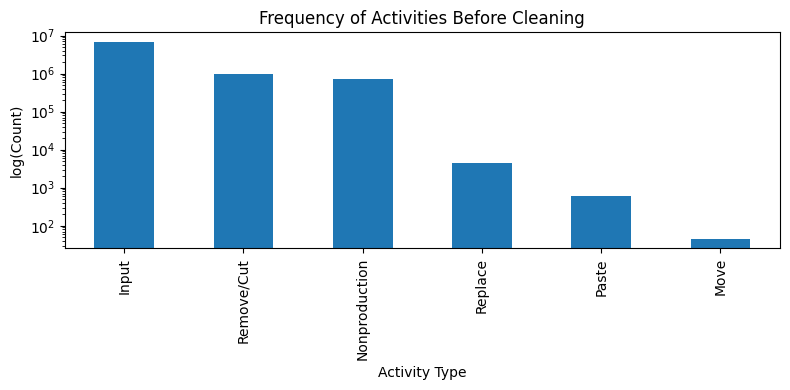

In [13]:
plt.figure(figsize=(8,4))
df_raw['activity'].value_counts().plot(kind='bar')

plt.yscale("log")    

plt.title("Frequency of Activities Before Cleaning")
plt.xlabel("Activity Type")
plt.ylabel("log(Count)")

plt.tight_layout()
plt.savefig(os.path.join(save_dir, "raw_activity_counts.png"), dpi=300)
plt.show()


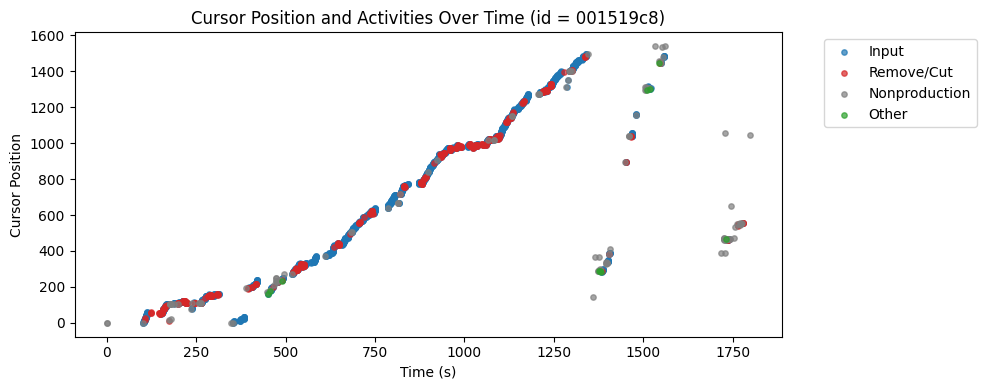

In [ ]:
sample_id = df_raw['id'].iloc[0]
sample = df_raw[df_raw['id'] == sample_id].copy()

sample['elapsed_time'] = (sample['down_time'] - sample['down_time'].min()) / 1000.0

plt.figure(figsize=(10,4))
color_map = {
    "Input": "tab:blue",
    "Remove/Cut": "tab:red",
    "Nonproduction": "tab:gray",
    "Other": "tab:green"
}

for activity, color in color_map.items():
    if activity == "Other":
        mask = ~sample['activity'].isin(['Input', 'Remove/Cut', 'Nonproduction'])
    else:
        mask = sample['activity'] == activity
    
    if mask.any():
        plt.scatter(sample[mask]['elapsed_time'], sample[mask]['cursor_position'],
                   c=color, s=15, alpha=0.7, label=activity)

plt.title(f"Cursor Position and Activities Over Time (id = {sample_id})")
plt.xlabel("Time (s)")
plt.ylabel("Cursor Position")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "raw_activity_timeline.png"), dpi=300, bbox_inches='tight')
plt.show()